<a href="https://colab.research.google.com/github/EnglishDevil/P4DS_A3project/blob/main/A3_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "./drive/My Drive/Colab Notebooks/A3_Data_Analysis_Project.ipynb" ./

cp: cannot stat './drive/My Drive/Colab Notebooks/A3_Data_Analysis_Project.ipynb': No such file or directory


## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# Analysis of the Relationship Between Deprivation, Covid 19 Cases and Deaths


### Project participants:

* Adam Hollings (sc20a2h@leeds.ac.uk)
* E. Liliana Valles Carrera (sc20elvc@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

### Data Sources

For this analysis we used five datasets related to Covid-19 in England or that can offer some insight about the population affected. 
* **Covid-19 cases**. This dataset offers information about the number of people with at least one positive Covid-19 test result in England. 
  * The covid-19 cases data has been taken from England’s official source of Covid-19 related data: coronavirus.data.gov.uk ([coronavirus-ases_latest.csv](https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv)) 
  * The number of daily cases is reported at national, regional and upper tier local authority (UTLA) from week 1 of 2020. 
  * This dataset is refreshed daily, however, we found that the completeness of the data on the most recent week is very poor therefore we are using an extract that covers up to week 45.
* **Deaths data**. Shows the weekly number of deaths registered in England and Wales. Includes a useful break down to specify deaths involving the coronavirus (Covid-19), by local authority and place of death. 
  * The covid19 deaths data has been taken from ons.gov and saved to [github](https://raw.githubusercontent.com/EnglishDevil/P4DS_A3project/main/lahbtablesweek45occurences.csvs://) as the original link updates weekly. As with cases data, we are using an extract that will look at up to week 45.  
* **Population data**. National and subnational mid-year population estimates (mid-2019) of the population for the UK and its constituent countries. 
  * This data is originally provided by [ONS](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland) and mapped to UTLA.
* **Index of multiple deprivation**. It is a relative measure of deprivation and can tell if one area is more deprived than another. It describes the indices of multiple deprivation for each local authority in the UK. All areas are then ranked with the top decile being most deprived and the lowest decile being least deprived. The main score used on our analysis is a combination of a range of deprivation scores including economic, environmental, education and employment.
  * IMD 2019 data has been taken from [the government website](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv). 
* **Geodata**. 
This data contains the digital vector boundaries for Local Authority Districts, in the United Kingdom, as at May 2020. The boundaries available are (BGC) Generalised (20m) clipped to the coastline (Mean High Water mark). The geodata also contains the local authority name and code so that it can be joined onto other data.
  * The geodata was taken from the [Geoportal](https://geoportal.statistics.gov.uk/datasets/3b374840ce1b4160b85b8146b610cd0c_0)

## Project Aim and Objectives (5 marks)

It has been about nine months since Covid-19 was declared a pandemic by the WHO on the 11th of March. It has already made history and we have not even seen the end of it and it raises important questions that can be answered through data. Governments, organisations and the general public have been paying much attention to understand patterns and trends that allow them to make informed decisions and our aim is to understand the differences across small geographical units in England (upper tier local authority (UTLA). 

It is well known that age is a contributing factor to higher mortality rates from Covid-19, we will try to understand its relationship with deprivation.

Deprivation can come in many forms, such as income, employment, crime and health deprivation. It is possible that people who live in deprived areas may be more likely to break quaratine (due to needing to take any work they can), be unware of the quaratine rules or the danger of covid19 or just be poor health to begin with (health deprivation).

Comparing across regions is important because some UTLAs with early apparent positive outcomes were not able to sustain their success or when analysed from a different angle we see that regardless of having low number of cases, the number of deaths was high. 

We are also interested on case fatality rate (the ratio between number of deaths and number of confirmed cases) and calculating its variation in England at UTLA level.

Just comparing deaths and deprivation score is not comparable between local authorities as different places have vastly different population sizes. Therefore, we will display deaths as deaths per 100,000 population so that it is relative between areas of low and high population.

In order to show the relationships, we will correlate the data with pandas and used sklearn linear regression to show a trend (if any). In order to make the findings more accessible we will plot them on maps of England so that the different death


We will do this by completeing the following objectives:



### Specific Objective(s)


* __Objective 1:__ Import, explore, clean, link and transform a number of databases that can offer insight about the Covid-19 situation.  
* __Objective 2:__  Identify the disparities in rates of infection spread and mortality due to Covid-19 in different parts of the county and cluster UTLAs according to the severity in cases and deaths.
* __Objective 3:__  Compare the Covid-19 outbreak in England using geospatial visualisations (maps) to provide context to answer the question: "Do deprived areas have higher Covid-19 death rates per head of population?"


## System Design (5 marks)


### Architecture
#### _Pipeline diagram_

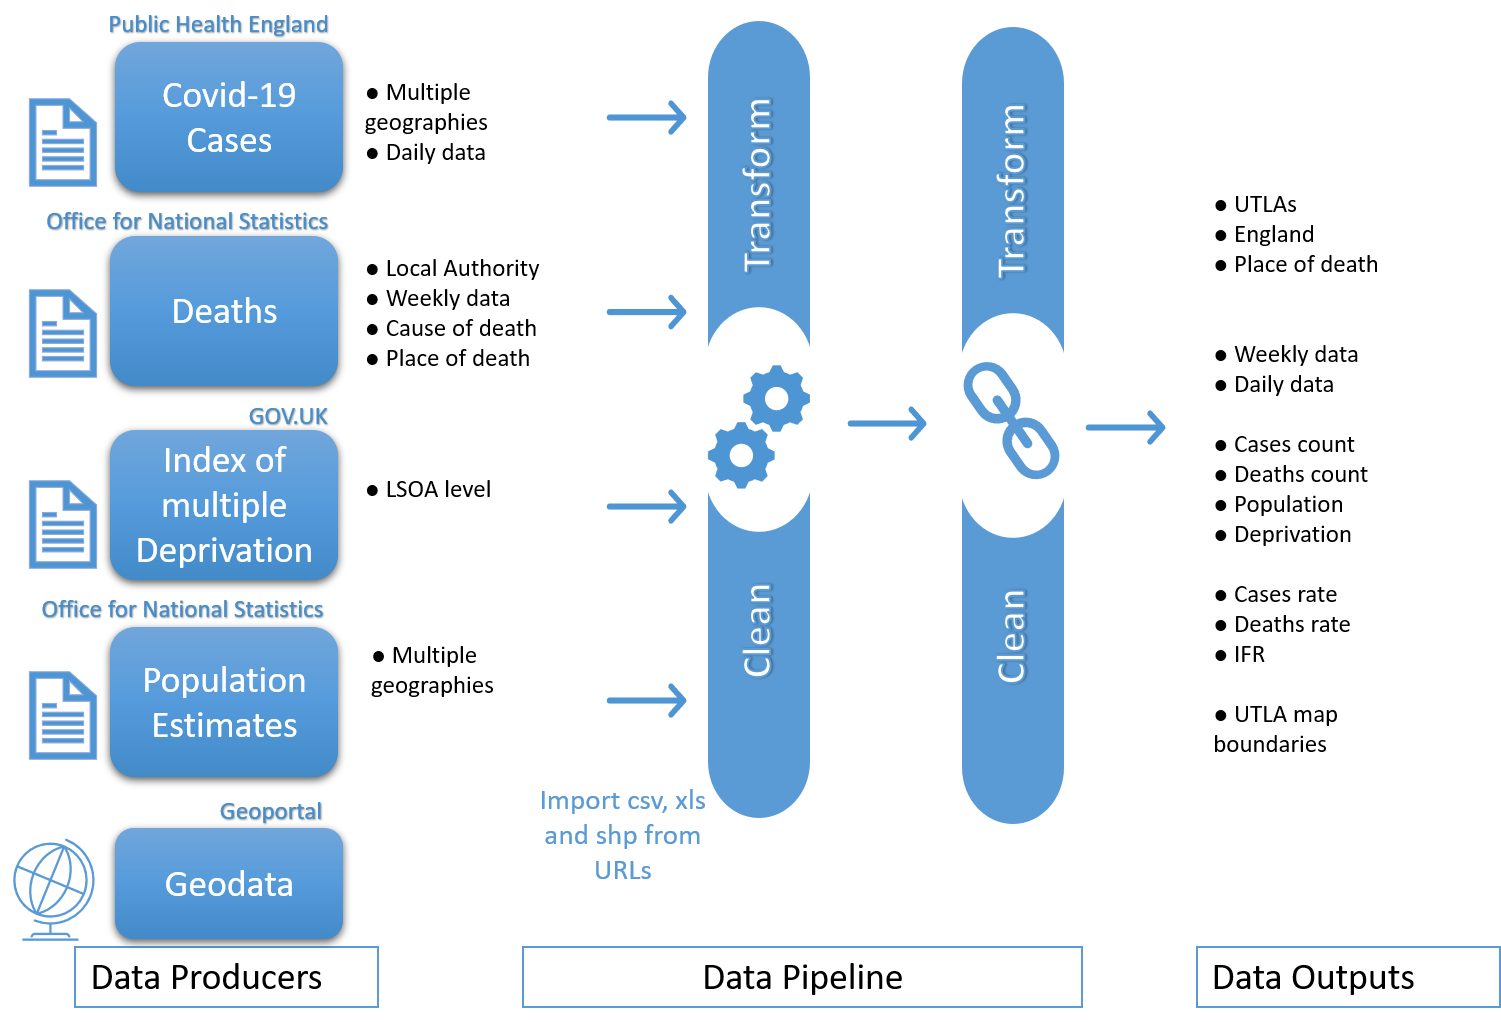

In [ ]:

display(Image('/content/Architecture diagram.png', width=800, height=600))


Data sources were imported from different governmental sites and had different file types that were transformed into pandas dataframes.

Data was then inspected to exclude irrelevant columns or rows included on some of the datasets, for example, details about deprivation, or rows with geographies at a higher or lower granularity than the one needed for our objectives, data out of the period selected. It was transformed and aggregated to be on comparable bases: cases are reported daily whereas deaths weekly.

Cleaned data were then linked together using single indexes and double indexes to align cases and deaths by UTLA and week. The data linkage revealed missed data which was investigated or filled with zeroes where appropriate.

Finally, some calculations important for our analysis were performed like data normalization and rates.

  
### Processing Modules and Algorithms

* The original data did not include a week number column and so we used datatime to convert the specimen data into a week number for 2020 so that it could be joined with the deaths data. The case numbers are recorded on a daily basis requiring aggregation in order to get totals for weeks. This dataset includes the local authority codes needed to join with the deaths data and geographic data.

* The data shows the deaths for each local authority in England, what week number of 2020 they occurred in and if the death was due to covid-19 or all causes. This dataset includes the local authority codes needed to join with the deaths data and geographic data.

* Cases and deaths datasets have been merged together on week number and local authority id in order to get the deaths and daily cases for each local authority in a given week.

* Some of the local authorities have changed since the IMD 2019 was done. The 4 local authorities below no longer exist and have been replaced with E06000060 (Buckinghamshire). The averages of the older authorities' IMD 2019 score and rank will be used and applied to the new one.

# Program Code (15 marks)

### Import of modules neccesary for analysis

Below we import the modules needed for analysis. Pandas and numpy are neccesary for importing and wrangling the data efficiently. For linear regression we chose sklearn as it is well regarded as an analytical tool. In order to plot the data to a chloropleth map we chose geopandas as it was avaible in anaconda and relatively easy to programme with.

In [ ]:
pip install geopandas

In [ ]:
pip install plotly==4.13.0

In [ ]:
#handling the data
import pandas as pd
import numpy as np
#linear regression
from sklearn.linear_model import LinearRegression
#mapping depedencies
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
#data visualisations
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from IPython.display import Image, display

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_yearly

## **Data Load**

### Import the cases data from data.gov
 The date column isn't a datetime so need to infer that using read_csv. The other datasets we will use use week number so we have used datetime to convert the date of the specimen count into a week number and added that as a column 'Week number'. We have sampled 5 records and called .info()  in order to confirm the columns and shape are as expected.

In [ ]:
# Sourcedata
url_cases ='https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
cases_df= pd.read_csv(url_cases,parse_dates=['Specimen date'],infer_datetime_format=True)

# Add week number to allow further linkage with death data and weekly aggregations.
cases_df['Week number'] = cases_df['Specimen date'].dt.isocalendar().week

#Small subset for forectast
cases_df_f = cases_df[(cases_df['Area type']=='nation') & (cases_df['Week number']<= 45)]

# Cases data includes other geographies under the column 'Area type', we are interested on small regions, UTLAs and cutting up to week 45

cases_df = cases_df[(cases_df['Area type']=='ltla') & (cases_df['Week number']<= 45)]


# Take a peak to make sure its fine
cases_df.head(5)

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate,Week number
26,Adur,E07000223,ltla,2020-11-08,6,442,687.4,45
27,Adur,E07000223,ltla,2020-11-07,4,436,678.1,45
28,Adur,E07000223,ltla,2020-11-06,11,432,671.8,45
29,Adur,E07000223,ltla,2020-11-05,5,421,654.7,45
30,Adur,E07000223,ltla,2020-11-04,7,416,647.0,45


Group the data and take a look to make sure its sensible. As can be seen below, the counts seem sensible as we can see the first and then the second national peaks in the covid case counts.

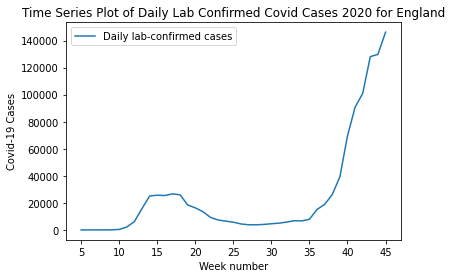

In [ ]:
# Agregate data to get cases by local area 
cases_df_utlas = cases_df.groupby(['Area name', 'Area code'
       , 'Week number'],as_index=False)[['Daily lab-confirmed cases']].sum()

# Agregate by week to preview the longterm trend
total_cases_grouped = cases_df_utlas[['Week number', 'Area code', 'Daily lab-confirmed cases']].groupby(['Week number']).sum()
#plot to make sure it mirrors reality
total_cases_grouped.plot(title = 'Time Series Plot of Daily Lab Confirmed Covid Cases 2020 for England', ylabel='Covid-19 Cases')

### Import deaths data. 
This file has been taken from [office of national statistics](https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fhealthandsocialcare%2fcausesofdeath%2fdatasets%2fdeathregistrationsandoccurrencesbylocalauthorityandhealthboard%2f2020/lahbtablesweek45.xlsx) and saved to a Adam's personal github as the link name changes every week with the week number. We then loaded the file from Adam's github into the notebook and displayed a sample of 5 records to check its sensible. 

In [ ]:
deaths_file = 'https://raw.githubusercontent.com/EnglishDevil/P4DS_A3project/main/lahbtablesweek45occurences.csv'
deaths_df = pd.read_csv(deaths_file)
deaths_df = deaths_df[deaths_df['Geography type']=='Local Authority']
# take a peak to make sure its sensible
print('deaths_df example:'), display(deaths_df.head())

# Aggregate regardless of the place of date

deaths_allsetting = deaths_df.groupby(['Area code', 'Geography type', 'Area name','Cause of death',
       'Week number'],as_index=False)[['Number of deaths']].sum()

covidDeath_all = deaths_allsetting[deaths_allsetting['Cause of death']=='COVID 19']

deaths_df example:


,Area code,Geography type,Area name,Cause of death,Week number,Place of death,Number of deaths
0,E06000001,Local Authority,Hartlepool,All causes,1,Care home,3
1,E06000001,Local Authority,Hartlepool,All causes,1,Elsewhere,0
2,E06000001,Local Authority,Hartlepool,All causes,1,Home,8
3,E06000001,Local Authority,Hartlepool,All causes,1,Hospice,1
4,E06000001,Local Authority,Hartlepool,All causes,1,Hospital,14


In [ ]:
#Preparing data split for further analyses. (all deaths, not just covid deaths)
covid_deaths = deaths_df[deaths_df['Cause of death']=='COVID 19'][['Area code', 'Number of deaths', 'Week number']]

covid_death_totals = covid_deaths[['Area code', 'Number of deaths']].groupby('Area code').sum()

alldeaths = deaths_df[deaths_df['Cause of death']=='All causes'][['Area code', 'Number of deaths', 'Week number']]
alldeaths_totals = alldeaths[['Area code', 'Number of deaths']].groupby('Area code').sum()


Below we can see in time data the peak in the middle of the covid outbreak which is an indication the data is sensible.

In [ ]:
def deaths_timeseries():
  """ Plot timeseries of the number of deaths in England due to covid and all other causes """
  deaths_allsetting_England = deaths_allsetting.groupby(['Cause of death', 'Week number'],as_index=False)[['Number of deaths']].sum()
  figd = px.line(deaths_allsetting_England, 'Week number', y='Number of deaths', color='Cause of death', title='Weekly Deaths by cause', width=1000, height=400)
  return figd.show()


It would also be interesting to see if the relationships where the same throughout the pandemic. The below defined function creates a total deaths dataframe for a set week. This has then been looped to create the dataframes for weeks 18 (the 1st peak), 35 (the low inbetween the peaks) and 45 (the start of the second peak).

In [ ]:
def week_number_covid_deaths(weeknumber):
  # this concisely creates a dataframe of total deaths for that week number. 
  week_number_deaths = deaths_df[['Area code', 'Number of deaths', 'Week number']][deaths_df['Cause of death']=='COVID 19'][deaths_df['Week number']==weeknumber]
  week_number_deaths_totals = week_number_deaths[['Area code', 'Number of deaths']].groupby('Area code').sum()
  return week_number_deaths_totals

We can directly insert the above function into the merges and map creation.

### Import population data
Here we import the population data from [office of national statistics](https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fpopulationestimatesforukenglandandwalesscotlandandnorthernireland%2fmid2019april2020localauthoritydistrictcodes/ukmidyearestimates20192020ladcodes.xls). When we try and extract data from the link it is getting a forbidden error and so we have uploaded it to Adam's github and are extracting it from there. Its an excel spreadsheet but we only need sheet 'MYE 5' and skip the first four rows of the sheet as it just contains advice on the use of the data and only columns A,B,E and F as the others are historic population estimates. The columns have been renamed to have shorter more easily called names and the Area

In [ ]:
#population
#pop_density_url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fpopulationestimatesforukenglandandwalesscotlandandnorthernireland%2fmid2019april2020localauthoritydistrictcodes/ukmidyearestimates20192020ladcodes.xls'
pop_density_url = 'https://github.com/EnglishDevil/P4DS_A3project/blob/main/ukmidyearestimates20192020ladcodes.xls?raw=true'
pop_density = pd.read_excel(pop_density_url, sheet_name='MYE 5', skiprows=4, usecols='A,B,E,F').rename(columns={'2019 people per sq. km':'2019_pop_per_km','Estimated Population mid-2019':'2019_pop', 'Code':'Area code'})
pop_density.head()

,Area code,Name,2019_pop,2019_pop_per_km
0,K02000001,UNITED KINGDOM,66796807.0,275.0
1,K03000001,GREAT BRITAIN,64903140.0,283.0
2,K04000001,ENGLAND AND WALES,59439840.0,394.0
3,E92000001,ENGLAND,56286961.0,432.0
4,E12000001,NORTH EAST,2669941.0,311.0


### Import deprivation data

We pulled the deprivation data from [assests.publishing.service.gov](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv). 
We then selected the relevant columns and renamed them to make them easier to type in code blocks. 
Finally as the origonal data is more granular we grouped the sub-regions in the local authorities and took a mean of the deprivation score and decile for that local authority.


In [ ]:
imd_2019_raw = pd.read_csv('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv')
imd_2019 = imd_2019_raw[['Local Authority District code (2019)','Index of Multiple Deprivation (IMD) Score', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']]
# E06000060 = {'Area code': 'E06000060','imd2019_score':9.470006,'imd2019_decile':8}
# imd_2019 = imd_2019.append(row_df)
imd_2019 = imd_2019.rename(columns={'Local Authority District code (2019)':'Area code','Index of Multiple Deprivation (IMD) Score': 'imd2019_score',
                          'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)': 'imd2019_decile'})
imd_2019 = imd_2019.groupby('Area code').mean()
imd_2019.head() # take a peak to make sure its sensible.

,imd2019_score,imd2019_decile
Area code,,
E06000001,34.853121,3.689655
E06000002,40.443116,3.383721
E06000003,29.841330,4.340909
E06000004,25.244108,5.208333
E06000005,26.787000,4.815385


**Some data cleaning**. Although the data has already been pre-cleaned as it is a published government dataseet, there is one issue. Some of the local authorities have changed since the IMD 2019 was done. The 4 local authorities below no longer exist and have been replaced with E06000060 (Buckinghamshire). The averages of the older authorities IMD 2019 score and rank will be used and applied to the new one

In [ ]:
print(covid_death_totals[~covid_death_totals.index.isin(imd_2019.index)].head(1)) #this prints all the regions that are in the death totals data set but missing from imd dataset. 
#we can see buckinghamshire is missing.
missing_areas = imd_2019[~imd_2019.index.isin(covid_death_totals.index)] #this selects the areas missing from the 2020 datasets due to the creation of Buckinghamshire
missing_areas.mean() #we get the mean score and decile

           Number of deaths
Area code                  
E06000060               434


imd2019_score     9.470006
imd2019_decile    8.153342
dtype: float64

### Geographic Data
In order to plot the data to maps we will also need geogprahic polygon data. We took shape files from [geoportal](https://geoportal.statistics.gov.uk/datasets/3b374840ce1b4160b85b8146b610cd0c_0) and read them into a geodataframe using geopandas. This automatically produces the polygons and coordinate data in a use ready format.

In [ ]:
geodf = gpd.read_file("https://github.com/EnglishDevil/P4DS_A3project/blob/main/Local_Authority_Districts__May_2020__Boundaries_UK_BGC-shp.zip?raw=true")

## **Data linkage** 


### Data linkage for local area comparisons (covid cases + population + deprivation index + deaths, by area and week)

In [ ]:
def mastertable():
  """ Createsa dataframe that links all the datasets, at the right granularity, needed for the second objective (covid cases + population + deprivation index + deaths) and cleans it """
  #merge cases with population data
  cases_pop = cases_df_utlas.merge(pop_density[['Area code','2019_pop']], on='Area code',how='left')

  #Add deprivation data
  cases_pop_IMD = cases_pop.merge(imd_2019[['imd2019_score', 'imd2019_decile']], on='Area code',how='left' ).reset_index()

  #Add death data
  cases_pop_IMD_deaths = pd.merge(cases_pop_IMD,covidDeath_all, on=['Area code', 'Week number'],how='left')

  # Keep only relevant columns
  df = cases_pop_IMD_deaths.filter(items=['Area name_x', 'Area code', 'Week number',
        'Daily lab-confirmed cases', '2019_pop', 'imd2019_score',
        'imd2019_decile', 'Number of deaths'])

  #Rename columns into a more friendlynames

  df.columns=['Area name', 'Area code', 'Week number','Cases', 'Pop', 'Deprivation','Deprivaion_decile', 'Deaths']

  #Remove empty columns for which there is no population estimate available (Buckinghamshire)
  df= df.dropna(subset=['Pop'])

  #Fill in empty rows of death columns with 0
  df=df.fillna(0)
  return df

df= mastertable()

### Data normalisation
To get the covid rate per 100k population, covid cases totals for each local authority (covid_death_totals) was merged with population data (pop_density) on 'Area code'. The covid rate per 100k was then worked out using the general calculation:

$$Covid Rate (per 100k) = {Covid Cases \over Total Resident Population} * 100,000$$
To get the death rate covid related death totals for each local authority (covid_death_totals) was merged with population data (pop_density) on 'Area code'. The crude death rate was then worked out using the general calculation:

$$Crude Death Rate (per 100k) = {Resident Deaths \over Total Resident Population} * 100,000$$


In [ ]:
#Death per 100k pupulation
df['Deaths_100k']=(df['Deaths']/df['Pop'])*100000

#Cases per 100k pupulation
df['Cases_100k']=(df['Cases']/df['Pop'])*100000

### Data linkage and data calculations for Covid-19 deaths and deprivation (population + deprivation index + deaths, by area and week)

To get the death rate covid related death totals for each local authority (covid_death_totals) was merged with population data (pop_density) on 'Area code'. The crude death rate was then worked out using the general described above.

This is then joined to the IMD data (imd_2019) on Area code in order to get the data set we can use for regression analysis.



This next cell defines the function that processes the input dataframe, merges it with population data, produces the crude death rate per 100,000 population, merges that with the imd data and then returns it as a dataframe. It also manually adds the imd2019 score and decile to the new county of Buckinghamshire which was created since imd2019 was done. Finally it dropsna in order to remove data on Wales which will have no associated imd2019 as the data only covered England.

In [ ]:
def merge_death_imd(inputdf):
  outputdf = inputdf.merge(pop_density[['Area code','2019_pop']], on='Area code',how='left')
  outputdf['Deaths_per_100k'] = (outputdf['Number of deaths']/outputdf['2019_pop'])*100000
  outputdf = outputdf[['Area code', 'Deaths_per_100k']].merge(imd_2019[['imd2019_score','imd2019_decile']],left_on='Area code',right_index=True,how='left')
  outputdf.at[56, 'imd2019_score'] = 9.47
  outputdf.at[56, 'imd2019_decile'] = 8
  outputdf = outputdf.dropna()
  return outputdf

### Cases and Deaths
#### Local area comparison analysis

In [ ]:
def topn_cases_plot(n):
  """ Plot the top n local authorities in terms of cases """
  top10_cases = df.groupby('Area name')['Cases'].sum().nlargest(n).sort_values(ascending=False)
  #fig, axes = plt.subplots(1,2)
  top10c_fig= px.bar(top10_cases, x=top10_cases.index, y='Cases', title='Top selected Covid-19 number of Cases by local autorities (up to week 45)', width=1000, height=450)
  return top10c_fig.show()

def topn_deaths_plot(n):
  """ Plot the top n local authorities in terms of deaths """
  top10_deaths = df.groupby('Area name')['Deaths'].sum().nlargest(n).sort_values(ascending=False)
  #fig, axes = plt.subplots(1,2)
  top10d_fig= px.bar(top10_deaths, x=top10_deaths.index, y='Deaths', title='Top selected Covid-19 number of Deaths by local autorities (up to week 45)', width=1000, height=450)
  return top10d_fig.show()

In [ ]:
#Get the top 20 affected areas by number of cases
def topnCases(n):
    '''Identify the top areas in the country with respect to number of confirmed Covid-19 cases'''
    #n=30
    df_topn = df.groupby('Area code',as_index=False)[['Cases']].sum().nlargest(n,'Cases')
    topn=df_topn['Area code'].tolist()
    topn_df_Cases= df[df['Area code'].isin(topn)]
    return topn_df_Cases

def topnDeaths(n):
    '''Identify the top areas in the country with respect to number of Covid-19 deaths'''
    #n=30
    df_topn = df.groupby('Area code',as_index=False)[['Deaths']].sum().nlargest(n,'Deaths')
    topn=df_topn['Area code'].tolist()
    topn_df_Deaths= df[df['Area code'].isin(topn)]
    return topn_df_Deaths

In [ ]:
# This is a key visualisation that puts together all the metrics obtained for this work. 

def severity_quadrants(n):
  """Shows the severity quadrans for the n'ths selected areas with the highest number of cases. It is suggested to use a value around 20-30  """
  # Aggregate cases and deaths by area to then normalise the data by 100k population
  topn_df2=topnCases(n).groupby(['Area name', 'Area code', 'Pop','Deprivation', 'Deprivaion_decile'],as_index=False)[['Cases','Deaths']].sum()

  #Death per 100k pupulation (needs to be recalculated as now we are reporting for the full period)
  topn_df2['Deaths_100k']=(topn_df2['Deaths']/topn_df2['Pop'])*100000

  #Cases per 100k pupulation (needs to be recalculated as now we are reporting for the full period)
  topn_df2['Cases_100k']=(topn_df2['Cases']/topn_df2['Pop'])*100000

  # Plot in a clever visual
  fig= px.scatter(topn_df2, x='Cases_100k', y="Deaths_100k", color="Area name", size="Pop", size_max=60, text='Area name', ) #

  # Divide in quadrants
  fig.add_trace(go.Scatter(x=[2700,5500],y= [130,130],opacity = 0.5,line = dict(width = 2,color = 'red')),row=1, col=1)   #horizontal line (this was hard!)
  fig.add_trace(go.Scatter(x=[4000,4000],y= [55,210],opacity = 0.5),row=1, col=1)    #vertical line 

  #Size of plot and title
  fig.update_layout(height=700, title_text= 'Covid-19 Cases vs Deaths (per 100k population) by top Local Authorities ')

  return fig.show()

In [ ]:
def fatality_rate_plot(n, level):
  """ Show the variation in fatality rate. n for top n, level: split by local areas type 'la', for England type 'England' (or any other word)"""
  #Conditional to display by Local Area or England
  if level=='la':

    # Fatality rate
    topn_cases_death=topnCases(n).groupby(['Area name', 'Area code', 'Week number'],as_index=False)[['Cases','Deaths']].sum()
    topn_cases_death['Case Fatality']=(topn_cases_death['Deaths']/topn_cases_death['Cases'])
    topn_cases_death['Year']=2020
    topn_cases_death['Date']=pd.to_datetime(topn_cases_death['Week number'].astype(str)+topn_cases_death['Year'].astype(str).add('-1'), format='%V%G-%u')

    fig2 = px.line(topn_cases_death, 'Date', y='Case Fatality', color='Area name', title='Covid-19 Fatality Rate by Local Authority')
  else:
      # Fatality rate
    topn_cases_death=topnCases(n).groupby(['Week number'],as_index=False)[['Cases','Deaths']].sum()
    topn_cases_death['Case Fatality']=(topn_cases_death['Deaths']/topn_cases_death['Cases'])
    topn_cases_death['Year']=2020
    topn_cases_death['Date']=pd.to_datetime(topn_cases_death['Week number'].astype(str)+topn_cases_death['Year'].astype(str).add('-1'), format='%V%G-%u')

    fig2 = px.line(topn_cases_death, 'Date', y='Case Fatality', title='Covid-19 Fatality Rate by Local Authority')  

  #Add explanatory annotated bands
  fig2.add_vrect(x0="2020-03-27", x1="2020-05-10", col=1,
                annotation_text="first cases peak", annotation_position="top left",
                fillcolor="red", opacity=0.25, line_width=0)
  fig2.add_vrect(x0="2020-10-02", x1="2020-11-02", col=1,
                annotation_text="Second peak", annotation_position="top right",
                fillcolor="green", opacity=0.25, line_width=0)

  return fig2.show()


In [ ]:
def forecast(p):
  """ How bad is it going to be? forecast using prophet """
  #Extract specific columns for the time series analysis
  cases_england= cases_df_f[['Specimen date', 'Daily lab-confirmed cases']]

  #Rename columns as required to fit the model
  cases_england.columns = ['ds', 'y']

  m = Prophet(yearly_seasonality=12).fit(cases_england)

  future = m.make_future_dataframe(periods=p, freq='MS')
  future['floor'] = 0
  forecast = m.predict(future)
  fig1 = m.plot(forecast)
  pass


In [ ]:
def death_setting(diagnosis):
  """ Plot a timeseries of the number of deaths split by place of death (setting), options are 'covid' or 'all' """
  # Prep the data to plot death timeseries by place
  covidDeath = deaths_df[deaths_df['Cause of death']=='COVID 19']
  if diagnosis=='covid':
    death_Place= covidDeath.groupby(['Place of death', 'Week number'],as_index=False)[['Number of deaths']].sum()
  elif diagnosis=='all':
    death_Place= deaths_df.groupby(['Place of death', 'Week number'],as_index=False)[['Number of deaths']].sum()
  else:
    'incorrect diagnosis'
  return px.line(death_Place, x='Week number', y='Number of deaths', color='Place of death')

## Deprivation and death rates analysis

We have used merge_death_imd to create the merged dataframes for total covid deaths, week 18, 35 and 45.
The same has been repeated for the all deaths data.

In [ ]:
death_rate_imd = merge_death_imd(covid_death_totals)
week18_covid_death_rate_imd = merge_death_imd(week_number_covid_deaths(18))
week35_covid_death_rate_imd = merge_death_imd(week_number_covid_deaths(35))
week45_covid_death_rate_imd = merge_death_imd(week_number_covid_deaths(45))
alldeaths_rate_imd = merge_death_imd(alldeaths_totals)
#peak to see the data format is right
death_rate_imd.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Area code,Deaths_per_100k,imd2019_score,imd2019_decile
0,E06000001,132.389524,34.853121,3.689655
1,E06000002,162.434388,40.443116,3.383721
2,E06000003,127.597521,29.841330,4.340909
3,E06000004,105.397572,25.244108,5.208333
4,E06000005,121.719427,26.787000,4.815385


## Linear regression to see if deprivation predicts covid deaths

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f042832d710>,
      dtype=object)

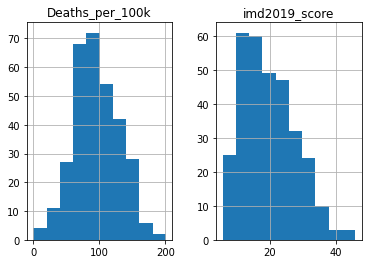

In [ ]:
death_rate_imd[['Deaths_per_100k','imd2019_score']].hist()

The data is normally distrubuted but there is no immediately obvious relationship from the scatter plot. The data doesn't seem to have any outliers but as this is published government data it has likely already been cleaned.

To do the linear regression first the values for Deaths per 100,000 population and imd2019 score are extracted and turned into numpy arrays. Then sklearns linear_regressor object to learn a trend in the data and produce a predicted dataset. This has then been plotted as a line over the origional dataset.

In [ ]:
 def regression_plots():
  fig0, axes0 = plt.subplots(1,3, figsize=(25,7))
  #plot 1 covid deaths
  X, Y , linear_regressor = death_rate_imd.iloc[:, 1].values.reshape(-1, 1), death_rate_imd.iloc[:, 2].values.reshape(-1, 1), LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)
  axes0[0].plot(X, Y_pred, color='red'), axes0[0].set_title('Rate of covid deaths per 100,000 against imd'), axes0[0].set_xlabel('covid death rate per 100,000 population'), axes0[0].set_ylabel('imd2019 score for Local Authorities'), axes0[0].scatter(X, Y)
  #plot 2 all deaths
  X, Y , linear_regressor = alldeaths_rate_imd.iloc[:, 1].values.reshape(-1, 1), alldeaths_rate_imd.iloc[:, 2].values.reshape(-1, 1), LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)
  axes0[1].plot(X, Y_pred, color='red'), axes0[1].set_title('Rate of all deaths per 100,000 against imd'), axes0[1].set_xlabel('Rate of all deaths per 100,000 population'), axes0[1].set_ylabel('imd2019 score for Local Authorities'), axes0[1].scatter(X, Y)
  #plot 3 week 45
  X, Y , linear_regressor = week45_covid_death_rate_imd.iloc[:, 1].values.reshape(-1, 1), alldeaths_rate_imd.iloc[:, 2].values.reshape(-1, 1), LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)
  axes0[2].plot(X, Y_pred, color='red'), axes0[2].set_title('imd2019 score against alcovidl 2020 Week 45 deaths per 100,000 population'), axes0[2].set_xlabel('Rate of covid deaths per 100,000 population'), axes0[2].set_ylabel('imd2019 score for Local Authorities'), axes0[2].scatter(X, Y)


IMD score does not appear to predict covid deaths per 100,000 population well. There is a small upward trend.

In the middle, a similar regression done for all England deaths during the same time period can be seen. There doesn't appear to be any significant relationship between all deaths in the in 2020 up to week 45 and deprivation score.

The right plot shows a similar regression for deaths in week 45, during the 2nd peak of cases. There are far fewer deaths during this peak and so many local authorities have shown zero deaths, but there is a weak correlation of 0.43 between imd score and death rate per 100 people for local authorities.

In [ ]:
week45_covid_death_rate_imd.corr()[['Deaths_per_100k']]

,Deaths_per_100k
Deaths_per_100k,1.000000
imd2019_score,0.431376
imd2019_decile,-0.349967



###  Geomapping process
In this section we take the deaths data, merge it with the geo-data using the Area code as a key and then map it using geopandas in order to display the distribution of the data across England and see if any patterns can be seen.

The join was performed using 'LAD20CD' local authority codes which have been renamed to 'Area Code' for consistency with the other datasets.


In [ ]:
#Rename LAD20CD as Area code to do the joins
geodf = geodf.rename(columns={'LAD20CD' : 'Area code'})
#merge the geodata and the covid deaths data
geo_deaths_df = geodf.merge(death_rate_imd, on='Area code')
#take a peak at the data to make sure its all fine
geo_deaths_df.head()

,OBJECTID,Area code,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,Deaths_per_100k,imd2019_score,imd2019_decile
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.67614,9.376780e+07,68415.419287,"MULTIPOLYGON (((449812.833 525824.034, 449819....",132.389524,34.853121,3.689655
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.54467,5.385868e+07,43775.371865,"MULTIPOLYGON (((446858.357 517197.945, 446854....",162.434388,40.443116,3.383721
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.56752,2.451441e+08,94926.255586,"MULTIPOLYGON (((451747.397 520561.100, 451787....",127.597521,29.841330,4.340909
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.55691,2.049028e+08,118347.998943,"MULTIPOLYGON (((446872.496 517119.096, 446872....",105.397572,25.244108,5.208333
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.53534,1.974858e+08,105777.871675,"POLYGON ((423475.701 524731.597, 423497.204 52...",121.719427,26.787000,4.815385


The process has been repeated for the week specific data and the all deaths data.

In [ ]:
geo_alldeaths_df = geodf.merge(alldeaths_rate_imd,on='Area code')
geo_week18_covid_deaths = geodf.merge(week18_covid_death_rate_imd,on='Area code')
geo_week35_covid_deaths = geodf.merge(week35_covid_death_rate_imd,on='Area code')
geo_week45_covid_deaths = geodf.merge(week45_covid_death_rate_imd,on='Area code')

### Functions to generate maps

Below we defined the functions to produce the chloropleth subplots. The lines of code define:

- a max and min (to reduce the impact of possible outliers)
- removal of the axis (as it fulfills little purpose for a map)
- customising the title and axes labels
- adding colourbars
- custom colouration for the maps
- custom linewidth to make the individual polygons more visible.  


This function generate three maps as sub plots allowing comparison.

In [ ]:
def compare_plots():
  fig, axes = plt.subplots(1,3, figsize=(40,15)) # create the array of subplots
  font = {'fontsize': '25', 'fontweight' : '3'} #font dictionary
  #add an annotation
  axes[0].annotate('Source: ONS, 2020. Creators: Adam Hollings and Liliana Valles Carrera.',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=20, color='#555555')
  #add each plot
  axes[1].set_title('Total Covid Death Rate', fontdict=font)
  geo_deaths_df.plot(ax=axes[1], column='Deaths_per_100k', cmap='BuGn',linewidth=0.5, 
                   edgecolor='0.8',vmin=0, vmax=150, legend=True, legend_kwds={'fraction': 0.04}) 
                    #create the plot with coloured line edges for the polygons and a custom min and max as well as giving it a legend and setting the legend size
  axes[1].axis('off') #remove the axis

  #IMD score
  axes[2].set_title('Local Authority average IMD 2019 deprivation score. Higher number is more deprived', fontdict=font)
  geo_deaths_df.plot(ax=axes[2], column='imd2019_score', cmap='Greys',linewidth=0.5, edgecolor='0.8', legend=True ,legend_kwds={'fraction': 0.04}), axes[2].axis('off')
  #Total Deaths
  axes[0].set_title('2020 Week 1 to Week 45 Total Death Rate', fontdict=font)
  geo_alldeaths_df.plot(ax=axes[0], column='Deaths_per_100k', cmap='BuGn',linewidth=0.5, edgecolor='0.8', legend=True, legend_kwds={'fraction': 0.04}), axes[0].axis('off')

Similar to the above, but this time for week data. This function allows the plots to be concisely called down bellow.

In [ ]:
def week_plots():
  #the same as above but for weeks 18, 35 and 45
  fig, axes = plt.subplots(1,3, figsize=(40,15))
  font = {'fontsize': '25', 'fontweight' : '3'}
  axes[0].annotate('Source: ONS, 2020. Creators: Adam Hollings and Liliana Valles Carrera.',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=20, color='#555555')

  axes[0].set_title('Week 18 Covid Death Rate',fontdict=font), geo_week18_covid_deaths.plot(ax=axes[0], column='Deaths_per_100k', cmap='BuGn',linewidth=0.5, edgecolor='0.8', legend=True, legend_kwds={'fraction': 0.04}), axes[0].axis('off')

  axes[1].set_title('Week 35 Covid Deaths Rate',fontdict=font), geo_week35_covid_deaths.plot(ax=axes[1], column='Deaths_per_100k', cmap='BuGn',linewidth=0.5, edgecolor='0.8', legend=True, legend_kwds={'fraction': 0.04}), axes[1].axis('off')

  axes[2].set_title('Week 45 Covid Deaths Rate',fontdict=font), geo_week45_covid_deaths.plot(ax=axes[2], column='Deaths_per_100k', cmap='BuGn',linewidth=0.5, edgecolor='0.8', legend=True, legend_kwds={'fraction': 0.04}), axes[2].axis('off')

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
From the linear regression of imd (indicies of multiple deprivation) against covid deaths in weeks 1 to 45 of 2020, it appears there is no significant relationship between the two. This appears to also be true at the height of the pandemic.

When the data is plotted onto maps, the covid death hotspots in Northern England do broadly overlap with areas of high deprivation but the same cannot be said for Southern England.



## Objective 1 _Import, explore, clean, link and transform a number of databases that can offer insight about the Covid-19 situation._

Most of this objective has been achieved in the Program Code section above. Using pandas and geopandas we were able to wrangle the data into an appropriate format for analysis. This included removing non-England data from the deaths data and appending IMD data for Buckinghamshire which did not exist in the 2019 IMD data. In order to merge different datasets columns had to be renamed so that keys matched. Data was grouped and summed in order to turn the indiviual daily counts into deaths for whole local authorities. This allowed population data to be merged with deaths data, which could the be used to work out the deaths per head of population. The calcuation for the crude death rate was applied to the deaths data before it was then merged into the IMD data. In order to plot the data to maps, geometry data was merged into the combined dataset using geopandas. Masks were used to restrict the data to certain time frames, such as week 18.

The end result was a series of dataframes that could be used for visualisation and analysis.

The visualiation below, Weekly Deaths by cause demonstrates that the data is sensible as we can see the first peak and the beginning of the second, as well as all deaths being much higher than covid only deaths.

In [ ]:
deaths_timeseries()

## Objective 2 
### Explanation of Results

The second objective was to identify the disparities in rates of infection spread and mortality due to Covid-19 in different parts of the county and cluster local authorities according to the severity in cases and deaths.
For this, it was important to see who are the local authorities that have been affected the most and for which magnitude.
As we can see below Birmingham, Leeds, Manchester, Bradford and Liverpool are on the lead for number of confirmed Covid-19 cases, and unsurprisingly they are consistently high on the number of deaths.

In [ ]:
topn_cases_plot(20)
topn_deaths_plot(20)


However, it might be natural to think that there are more cases and deaths because those local authorities are highly populated. Therefore, it is imperative to normalize the data with respect to the population.
The two previous plots highlight that more cases aren’t always fully associated with the number of deaths. For example, Manchester is number 3 in cases but only number 8 in deaths. County Durham is fourth for deaths and eight for cases. Because of this, the following visual offers a better picture of the situation:

In [ ]:
severity_quadrants(30)

By plotting cases per 100k population against covid deaths by 100k population we cannot see a correlation, but the insight we can get from this is great, especially by looking at the size of the points which is proportional to the population of the local authority.
The top quadrants are the worst places to be, it means they have been the local authorities with worse fatality rates and where the prevalence of covid is higher. In the last few months, big cities like Liverpool and Birmingham have caught the attention of the press, but this plot highlights the importance to pay attention to smaller local authorities like Sunderland, Tamerside or Bury who have high death rates (regardless of not having the highest number of cases).
What makes some local authorities to be on one quadrant or the other? The next steps for public health bodies would be to analyse the differences in measures between for the Local authorities on the top right quadrant and the ones on the bottom left and asses which measures have been more effective (social distancing, home isolation, closure of schools and universities, etc). In this analysis, we will look at factors like deprivation index to see if it plays a role.


Another good way to measure the severity of the situations is by looking at the fatality rate which is the ratio between number of deaths and number of confirmed cases. A report from the Imperial College London Covid-19 Response team reveals that high-income countries have an estimated overall infection fatality ratio of 1.15%.  
Below we can see how it varies in time and by area.

In [ ]:
fatality_rate_plot(10, 'la')
#fatality_rate_plot(100, 'en')

Overall, there have been many excess deaths in care homes and homes peaking around weeks 15 and 16. Over the course of the pandemic, the proportion of deaths with respect to cases has gone down. 

In [ ]:
death_setting('all')
#death_setting('covid')

A bonus on this analysis is the following forecast using a forecasting tool called prophet which was developed by Facebook and where we are forecasting that the numbers are going down in time for Christmas but it is expected to go up again. Here we are forecasting 2 periods of 30 days. The closer it is to the most recent period, the predictions are better. 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


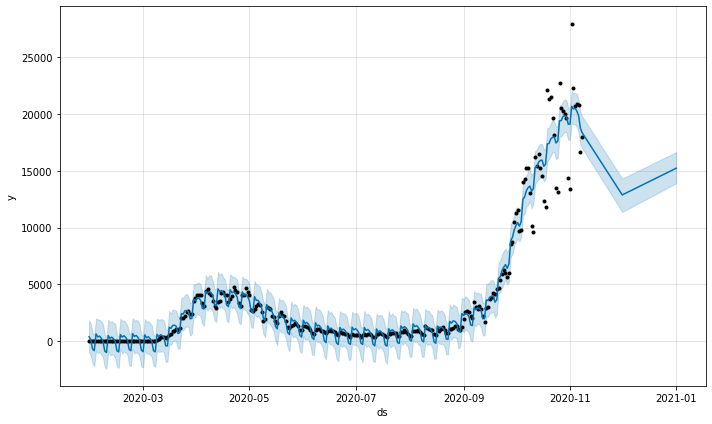

In [ ]:
forecast(2)

## Objective 3 _Compare the Covid-19 outbreak in England using geospatial visualiations (maps) to provide context and answer the question: "Do deprived areas have higher covid death rates per head of population?"_
### Explanation of Results

The quick correlation analysis below suggests there is not a significant relationship between either imd 2019 score or imd 2019 decile and covid deaths per 100,000 population (Deaths_per_100k) for each local authority.

There is a slightly higher correlation at week 45 although still not significant.

In [ ]:
death_rate_imd.corr()[['Deaths_per_100k']]

,Deaths_per_100k
Deaths_per_100k,1.000000
imd2019_score,0.257661
imd2019_decile,-0.189335


In [ ]:
week45_covid_death_rate_imd.corr()[['Deaths_per_100k']]

,Deaths_per_100k
Deaths_per_100k,1.000000
imd2019_score,0.431376
imd2019_decile,-0.349967


The scatter plots and results of the linear regression shown below support the above correlations. The results are quite dispersed and so any trend line shown must be viewed with a lot of skepticism. 

The left hand plot shows covid deaths and the middle plot shows all deaths in the study period (weeks 1 - 45 of 2020) with each dot representing one local authority. All deaths has slightly more clustering towards the bottom but it is not enough to be significant.

The right plot shows a similar regression for deaths in week 45, during the 2nd peak of cases. There are far fewer deaths during this peak and so many local authorities have shown zero deaths, but there is a weak correlation of 0.43 between imd score and death rate per 100 people for local authorities.  
### Scatter plots of Covid 19 deaths per 100,000 population against IMD score for each local authority in England

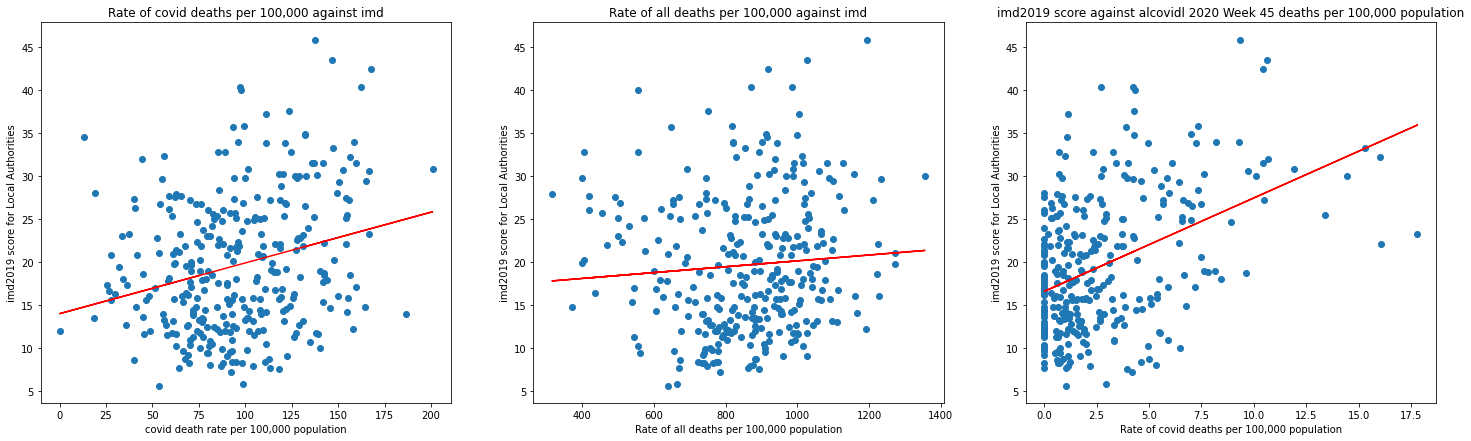

In [ ]:
regression_plots()

We have visualised the data using chloropleth maps as can be seen below. The right hand plot shows the IMD 2019 score for each local authority in the UK (taken as an average of its sub-regions scores). The distribution of high deprivation (darker grey) areas appears to be clustered into the far north, a band running through central enflang and then along the coast line in places of Southern England. The covids deaths per 100,000 population do not appear to match this for much of southern England

However, Norther England does appear to have a closer match between areas with a high covid death rath and higher deprivation, with a clear band of lower death rate and lower deprivation local authorities in between. This is a possible avenue for further analysis.

Total death rate per 100,000 people has been shown for comparison, and so regions that showed comparatively few covid deaths duirng the epidemic have experienced higher total deaths than other regions. This could indicate that not all covid related deaths are being reported as such in some regions.

### Chloropleth deaths per 100,000 population for each local authority in England for weeks 1-45, with IMD 2019 score for each local authority shown for comparison



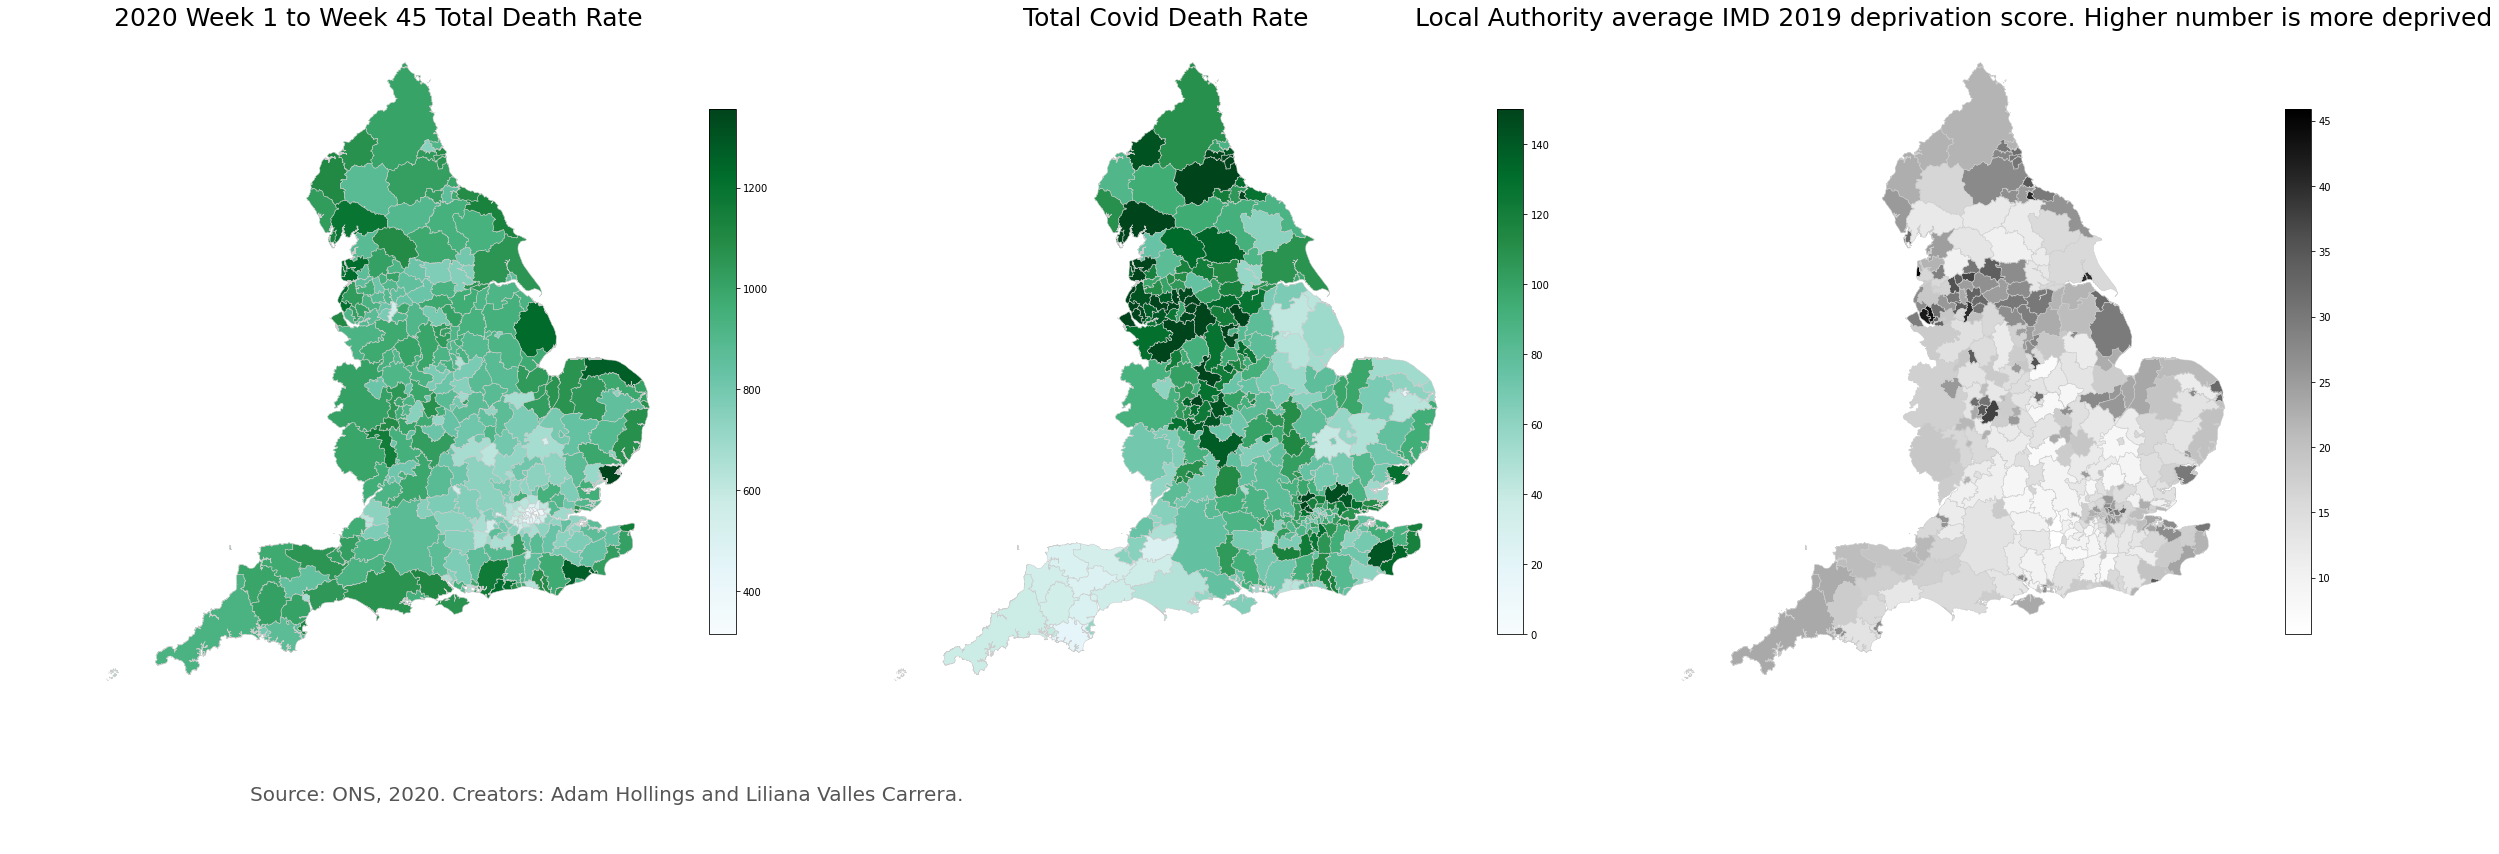

In [ ]:
compare_plots()

Following on from the previous figures, we have the same analysis done but for weeks 18 (the first peak), week 35 and week 45. In week 35 and week 45 it is clear that there are higher covid death rates in Northern England, which generally has higher deprivation and so supports the idea that further study should analyse Northern England alone in more detail. 

For week 18 the deaths rates seem largely similar to the week 1-45 analysis in the previous figures.

### Chloropleth deaths per 100,000 population for each local authority in England for certain weeks

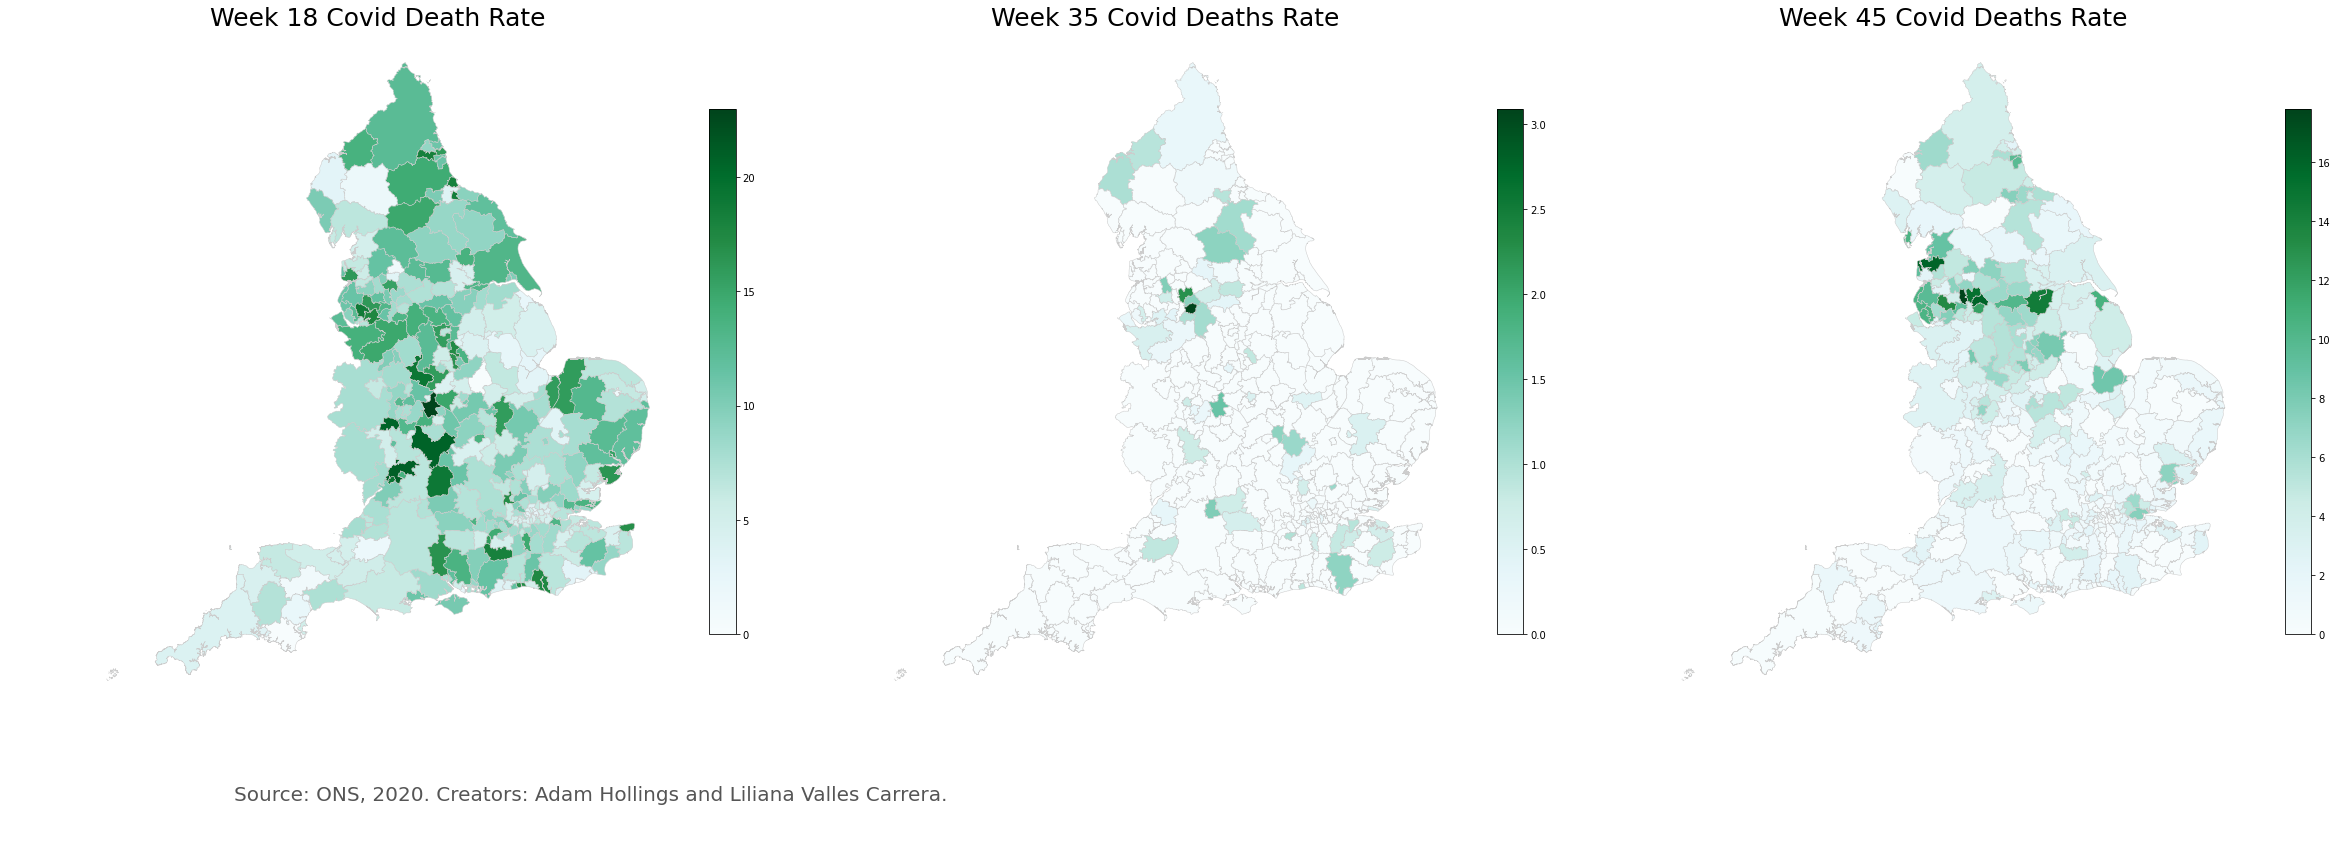

In [ ]:
week_plots()

# Conclusion (5 marks)

There is no clear relationship between Covid19 deaths per 100,000 people and the average deprivation score for local authorities, assuming local authorities have similar population demographics.

### Acheivements
We achieved our original objectives and more. 
*	We learnt more about an interesting topic that is personally affecting our day to day. 
*	To visualise the data we decided to explore different packages and aim to understand the advantages of some over the others, we were able to present beautiful visuals to convey relevant information for the topic. 
*	Became highly proficient on manipulating datasets using pandas.
*	Developed and applied functions to create a tidier report.
*	Learnt about the dependencies of the multiple packages available to use on python.
*	Learnt about the advantages and disadvantages of using Jupyter notebooks and Google colab (we used both and ensured this notebook worked on both)
* Used markdown effectively to present a formatted interactive report


### Limitations

Data availability at the right granularity limited the type of analysis we could have performed. 
Apart from population, our analysis assumed that the demographics for each local authority are identical. This was due to time constraints on the analysis. 

Race has been repoted to influence death rates from covid19, although this could be confounded by many factors such as age, general health and other factors. Our study assumed all counties had a similar racial make up and that all races have a similar death rate for covid. It is possible that by doing further breakdowns by race you could uncover a hidden relationship between deprivation and covid 19 death rate

Age has been shown to have a strong relationship with death from covid19. It is possible that age confound the results if some areas have significantly more older or younger residents. This analysis assumed distribution of ages was equal across all counties, so some method of age-standarisation may reveal trends that have been hidden. 

This analysis only looks at the local authority level, however deprivation can vary significantly even within a local authority. An example is Craven, which is not a deprived area but one of the lower super output areas within Craven, Skipton South, is within the most deprived decile in the UK. A more granular study may discover trends.

### Future Work

The severity quadrant visual raised many questions that can potentially be responded with data. What makes it more likely to be on one quadrant or another one? What measures have been more effective? What has been the impact of the measures? 
The maps of the covid deaths across the UK did appear to show more Covid related deaths in Northern England as well as more deprived areas. A further study just focusing on Northern England, with age-standarisation and looking at regions more granulalrly than local authority may reveal a trend that has been hidden.

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [ ]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60